In [2]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import cv2
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
from matplotlib.patches import Polygon
import os
# from matplotlib.collection import PatchCollection

In [3]:
dataDir='../..'

train_data='train2017'
train_ann='{}/annotations/instances_{}.json'.format(dataDir, train_data)
val_data='val2017'
val_ann='{}/annotations/instances_{}.json'.format(dataDir,val_data)




In [5]:
# initialize COCO api for instance annotations
# coco=COCO(train_ann)
coco = COCO(train_ann)


loading annotations into memory...
Done (t=11.92s)
creating index...
index created!


In [242]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

super_cats = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(super_cats)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
sports food electronic furniture vehicle indoor accessory person outdoor kitchen animal appliance


In [243]:
category = ['sports']
print(type(category[0]))
print(len(nms))

<class 'str'>
80


In [247]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=category)
imgIds = coco.getImgIds(catIds=catIds );
remove_imgs = '../../coco_corrupted_images/'
r = listdir(remove_imgs)
# print(r)
b =0
for i in r:
#     print(i)
    k = i.split('.')[0]
#     print(k, int(k))
    print(b)
    imgIds.remove(int(k))
    b+=1
# imgIds.remove(398858)
# imgIds.remove(533408)
# imgIds.remove(405740)
print(len(imgIds))
# totals = 0
# for i in nms:
#     g = coco.getCatIds(catNms=[i])
#     h = coco.getImgIds(catIds=g)
# #     print(i, len(h))
#     totals += len(h)
# print(len(imgIds))
# print(totals)
# imgIds = coco.getImgIds(imgIds = imgIds[155])
# print(imgIds)
# img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
# print(img)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
118242


[204805]
{'license': 7, 'file_name': '000000204805.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000204805.jpg', 'height': 346, 'width': 500, 'date_captured': '2013-11-14 21:33:07', 'flickr_url': 'http://farm4.staticflickr.com/3251/2843692498_cb1559002c_z.jpg', 'id': 204805}
[319494]
{'license': 2, 'file_name': '000000319494.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000319494.jpg', 'height': 480, 'width': 640, 'date_captured': '2013-11-18 06:08:05', 'flickr_url': 'http://farm3.staticflickr.com/2861/9460751874_25e65d4a8b_z.jpg', 'id': 319494}
[49165]
{'license': 4, 'file_name': '000000049165.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000049165.jpg', 'height': 480, 'width': 640, 'date_captured': '2013-11-18 00:50:43', 'flickr_url': 'http://farm5.staticflickr.com/4129/4844292925_7f7f6a4cb6_z.jpg', 'id': 49165}
[180239]
{'license': 4, 'file_name': '000000180239.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000180239.jpg

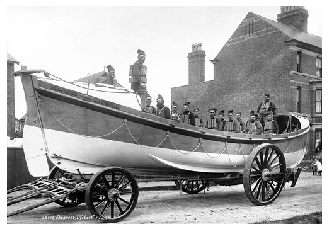

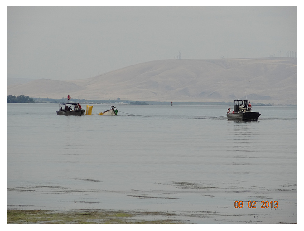

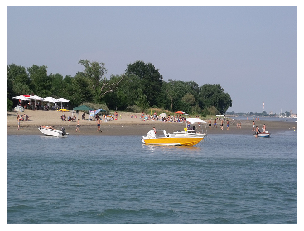

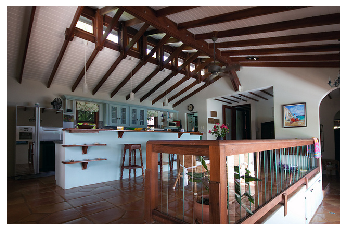

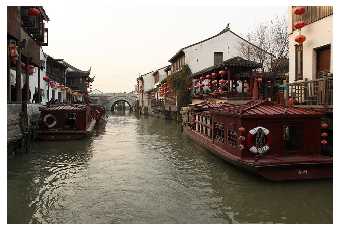

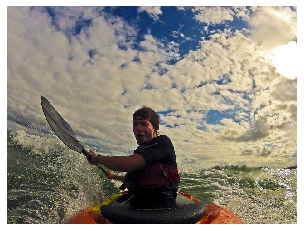

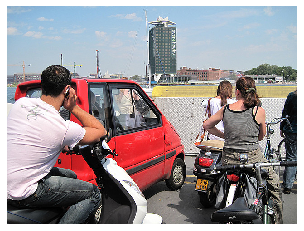

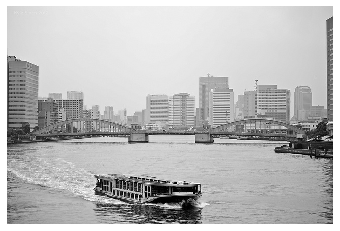

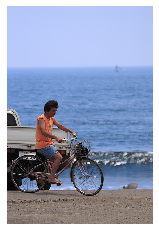

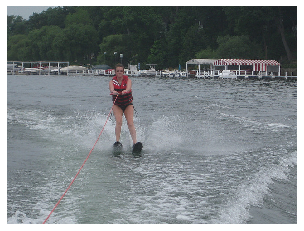

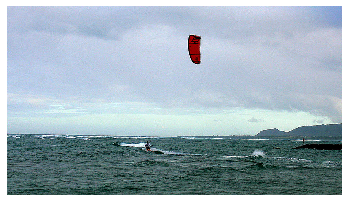

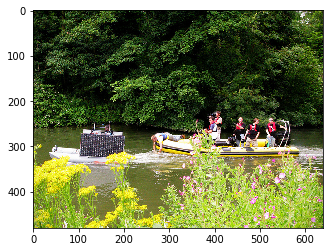

In [146]:
# %matplotlib notebook'motorcycle'

for i in range(12):
    imgId = coco.getImgIds(imgIds=imgIds[i])
#     img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
    img = coco.loadImgs(imgIds[i])[0]
    print(imgId)
    print(img)
    
    I = io.imread('%s/%s/%s'%(dataDir,train_data,img['file_name']))
#     I = io.imread(img['coco_url'])
    plt.axis('off')
    plt.figure(i+1)
    plt.imshow(I)
    
plt.show()

[204805]
{'license': 7, 'file_name': '000000204805.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000204805.jpg', 'height': 346, 'width': 500, 'date_captured': '2013-11-14 21:33:07', 'flickr_url': 'http://farm4.staticflickr.com/3251/2843692498_cb1559002c_z.jpg', 'id': 204805}
[319494]
{'license': 2, 'file_name': '000000319494.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000319494.jpg', 'height': 480, 'width': 640, 'date_captured': '2013-11-18 06:08:05', 'flickr_url': 'http://farm3.staticflickr.com/2861/9460751874_25e65d4a8b_z.jpg', 'id': 319494}
[49165]
{'license': 4, 'file_name': '000000049165.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000049165.jpg', 'height': 480, 'width': 640, 'date_captured': '2013-11-18 00:50:43', 'flickr_url': 'http://farm5.staticflickr.com/4129/4844292925_7f7f6a4cb6_z.jpg', 'id': 49165}
[180239]
{'license': 4, 'file_name': '000000180239.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000180239.jpg

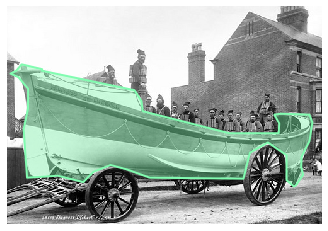

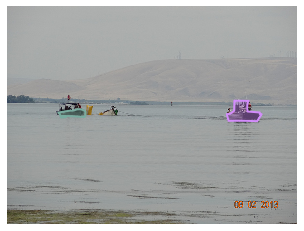

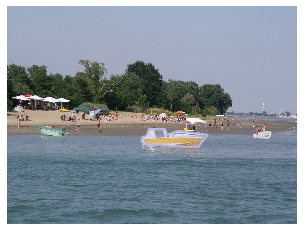

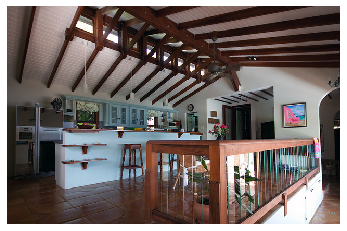

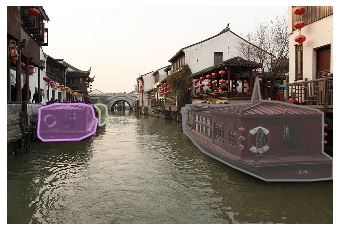

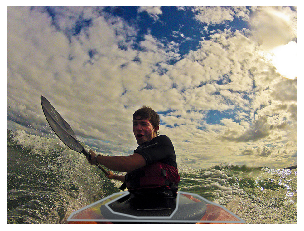

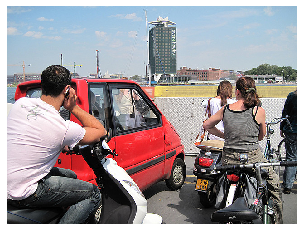

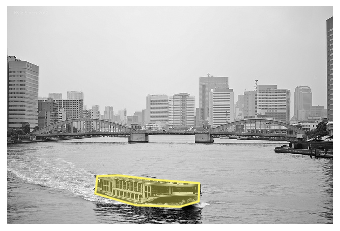

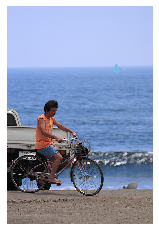

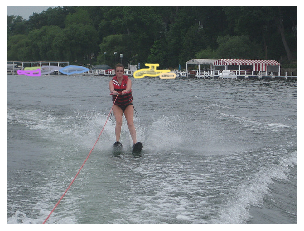

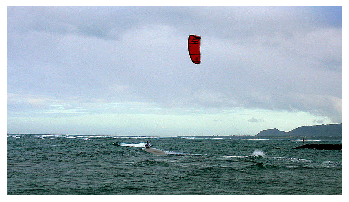

In [147]:
# load and display instance annotations

for i in range(11):
    imgId = coco.getImgIds(imgIds=imgIds[i])
#     img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
    img = coco.loadImgs(imgIds[i])[0]
    print(imgId)
    print(img)
    
    I = io.imread('%s/%s/%s'%(dataDir,train_data,img['file_name']))
#     I = io.imread(img['coco_url'])
    plt.figure(i+1)
    plt.imshow(I); plt.axis('off')
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    conts = coco.showAnns(anns)

    # print(conts)
#     print(type(conts))
#     print(len(anns))

In [148]:
# img_Id = coco.getImgIds(imgIds=imgIds[imgIds.index(460347)])
# l = coco.loadImgs(imgIds[imgIds.index(460347)])[0]
# img_1 = io.imread('%s/%s/%s'%(dataDir,val_data,l['file_name']))
# plt.figure()
# plt.imshow(img_1)
# plt.show()
print(imgIds[3020])

335861


In [149]:
# plt.figure(i+1)
# plt.imshow(img_1); plt.axis('off')
# annIds = coco.getAnnIds(imgIds=l['id'], catIds=catIds, iscrowd=None)
# anns = coco.loadAnns(annIds)
# conts = coco.showAnns(anns)
# print(len(conts))

# conts = np.asarray(conts)
# print(conts)

# print(conts.shape)
# print(conts.ndim)
# if conts.shape[0]==1:
#     cnt=conts
# else:
    
#     conts = np.reshape(conts, (conts.shape[0],1))
#     print(conts.shape)
#     cnt = conts[0]


# cnt = conts[0]
# print(cnt.shape)
# print(cnt)
# print(cnt.shape)
# cnt = np.asarray(cnt)

1
3
(1, 10, 2)
(1, 10, 2)
(10, 2)


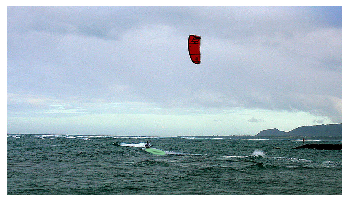

In [150]:
# print(conts)
# wht_image = cv2.bitwise_not(np.zeros(I.shape, np.uint8))
# I = io.imread('%s/%s/%s'%(dataDir,dataType,img['file_name']))
# I = io.imread(img['coco_url'])
plt.figure(i+1)
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
conts = coco.showAnns(anns)

print(len(conts))

conts = np.asarray(conts)
# print(conts)
print(conts.ndim)
print(conts.shape)

if conts.shape[0]==1:
    cnt=conts
else:
    
    conts = np.reshape(conts, (conts.shape[0],1))
    print(conts.shape)
    cnt = conts[0]
print(cnt.shape)
# print(cnt[0])
print(cnt[0].shape)
cnt = np.asarray(cnt)
# print(cnt)



cv2.drawContours(I, np.int32([cnt[0]]), -1, (0,0,0), -1)

plt.axis('off')
plt.imshow(I)
plt.show()
io.imsave('forged_image.png', I)

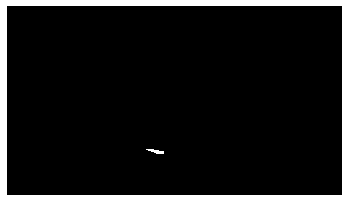

In [151]:
# plt.axis('off')
# plt.imshow(wht_image)
# plt.show()
# io.imsave('mask_forged.png', wht_image)

# black_image = cv2.bitwise_not(np.ones(I.shape, np.uint8))
black_image = np.zeros(I.shape, np.uint8)
plt.figure()
# plt.imshow(black_image)
cv2.drawContours(black_image, np.int32([cnt[0]]), -1, (255, 255, 255), -1)
plt.axis('off')
plt.imshow(black_image)
plt.show()
io.imsave('mask_forged_inverse.png', black_image)

# for cnt in conts:
#     print(cnt.shape)
# #     cnt = np.array(cnt).reshape((-1,46,2)).astype(numpy.int32)
#     cv2.drawContours(I, np.int32([cnt[0]]), 0, (0,255,0), 2)
#     plt.imshow(I)
#     plt.show()
# #     cv2.waitKey()
# Polygon()
# print()
# p = Pat

1


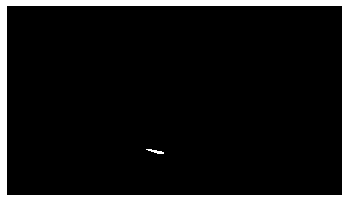

In [152]:
mask = coco.annToMask(anns[0])
print(len(anns))
for i in range(len(anns)):
    mask += coco.annToMask(anns[i])
plt.imshow(mask, cmap=plt.cm.gray)
plt.axis('off')
# plt.savefig('asjdbkba.png')
plt.imsave('mask _mofo.png', mask, cmap=plt.cm.gray)
mnb = cv2.resize(mask, (256, 256))
plt.imsave('resizesssadas.png', mnb, cmap = plt.cm.gray)

1
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


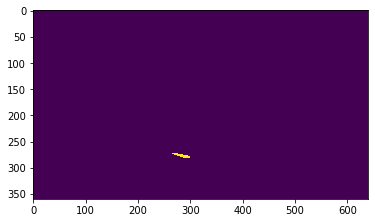

In [153]:
print(len(anns))
mask = coco.annToMask(anns[0])
print(mask)
plt.imshow(mask) 
new_mask = cv2.resize(mask, (256, 256))
plt.imsave('check_size.png', new_mask, cmap=plt.cm.gray)

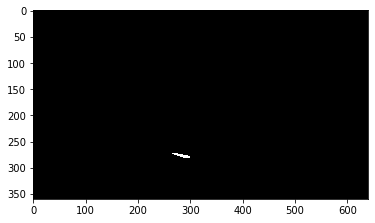

In [154]:
if len(anns)>1:
    mask+=coco.annToMask(anns[1])
# else:
#     continue
plt.imshow(mask, cmap=plt.cm.gray)

[262284]
0


IndexError: list index out of range

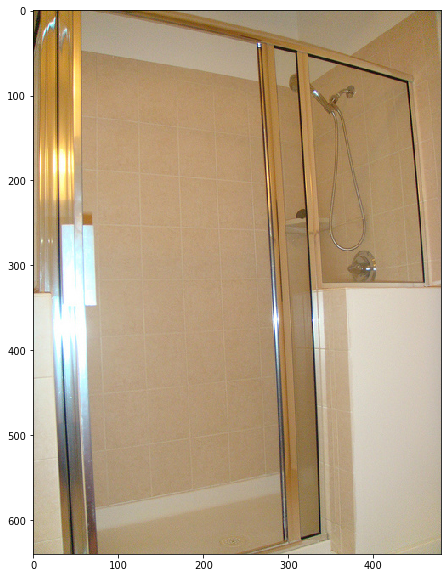

In [264]:
print(imgId)
plt.imshow(I);
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
print(len(annIds))
anns = coco.loadAnns(annIds[0])
print(len(anns))
coco.showAnns(anns)
print(type(anns))

In [222]:
import os
from os import listdir
from PIL import Image

dir_path = '../../train2017/'
filesss = []

# for filename in listdir(dir_path):
#     if filename.endswith('.jpg'):
#         try:
#             img = Image.open(dir_path+"\\"+filename) # open the image file
#             img.verify() # verify that it is, in fact an image
#         except (IOError, SyntaxError) as e:
#             print('Bad file:', filename)
#             filesss+=[filename]

            
for filename in listdir(dir_path):
#     if filename.endswith('.jpg'):
    try:
        img = Image.open(dir_path+filename) # open the image file
        img.verify() # verify that it is, in fact an image
#     except (IOError, SyntaxError) as e:
    except (ValueError) as e:
        print('Bad file:', filename)
        filesss+=[filename]
print(len(filesss))

OSError: cannot identify image file '../../train2017/000000429096.jpg'

In [223]:
# for i in nms[:10]:
#     print(i)
#     print(type(i))
remove_imgs = '../../coco_corrupted_images/'
r = listdir(remove_imgs)
print(r)
print(len(imgIds))

['000000114419.jpg', '000000179812.jpg', '000000167581.jpg', '000000019428.jpg', '000000346940.jpg', '000000347351.jpg', '000000246145.jpg', '000000191332.jpg', '000000353982.jpg', '000000185221.jpg', '000000026226.jpg', '000000390182.jpg', '000000420371.jpg', '000000028662.jpg', '000000205362.jpg', '000000397925.jpg', '000000337993.jpg', '000000174504.jpg', '000000300876.jpg', '000000381999.jpg', '000000284994.jpg', '000000554841.jpg', '000000221547.jpg', '000000247123.jpg', '000000255124.jpg', '000000377017.jpg', '000000326354.jpg', '000000234785.jpg', '000000398858.jpg', '000000238178.jpg', '000000113707.jpg', '000000198463.jpg', '000000496404.jpg', '000000391436.jpg', '000000186720.jpg', '000000156858.jpg', '000000414439.jpg', '000000124182.jpg', '000000392148.jpg', '000000547471.jpg', '000000503155.jpg', '000000038396.jpg', '000000429096.jpg', '000000533408.jpg', '000000405740.jpg']
4803


In [250]:
print(len(imgIds))
imgIds.remove(22547)

3588


ValueError: list.remove(x): x not in list

000000114419 114419
000000179812 179812
000000167581 167581
000000019428 19428
000000346940 346940
000000347351 347351
000000246145 246145
000000191332 191332
000000353982 353982
000000185221 185221
000000026226 26226
000000390182 390182
000000420371 420371
000000028662 28662
000000205362 205362
000000397925 397925
000000337993 337993
000000174504 174504
000000300876 300876
000000381999 381999
000000284994 284994
000000554841 554841
000000221547 221547
000000247123 247123
000000255124 255124
000000377017 377017
000000326354 326354
000000234785 234785
000000398858 398858
000000238178 238178
000000113707 113707
000000198463 198463
000000496404 496404
000000391436 391436
000000186720 186720
000000156858 156858
000000414439 414439
000000124182 124182
000000392148 392148
000000547471 547471
000000503155 503155
000000038396 38396
000000429096 429096
000000533408 533408
000000405740 405740
000000114419 114419
000000179812 179812
000000167581 167581
000000019428 19428
000000346940 346940
00000

000000114419 114419
000000179812 179812
000000167581 167581
000000019428 19428
000000346940 346940
000000347351 347351
000000246145 246145
000000191332 191332
000000353982 353982
000000185221 185221
000000026226 26226
000000390182 390182
000000420371 420371
000000028662 28662
000000205362 205362
000000397925 397925
000000337993 337993
000000174504 174504
000000300876 300876
000000381999 381999
000000284994 284994
000000554841 554841
000000221547 221547
000000247123 247123
000000255124 255124
000000377017 377017
000000326354 326354
000000234785 234785
000000398858 398858
000000238178 238178
000000113707 113707
000000198463 198463
000000496404 496404
000000391436 391436
000000186720 186720
000000156858 156858
000000414439 414439
000000124182 124182
000000392148 392148
000000547471 547471
000000503155 503155
000000038396 38396
000000429096 429096
000000533408 533408
000000405740 405740
000000114419 114419
000000179812 179812
000000167581 167581
000000019428 19428
000000346940 346940
00000

000000114419 114419
000000179812 179812
000000167581 167581
000000019428 19428
000000346940 346940
000000347351 347351
000000246145 246145
000000191332 191332
000000353982 353982
000000185221 185221
000000026226 26226
000000390182 390182
000000420371 420371
000000028662 28662
000000205362 205362
000000397925 397925
000000337993 337993
000000174504 174504
000000300876 300876
000000381999 381999
000000284994 284994
000000554841 554841
000000221547 221547
000000247123 247123
000000255124 255124
000000377017 377017
000000326354 326354
000000234785 234785
000000398858 398858
000000238178 238178
000000113707 113707
000000198463 198463
000000496404 496404
000000391436 391436
000000186720 186720
000000156858 156858
000000414439 414439
000000124182 124182
000000392148 392148
000000547471 547471
000000503155 503155
000000038396 38396
000000429096 429096
000000533408 533408
000000405740 405740
000000114419 114419
000000179812 179812
000000167581 167581
000000019428 19428
000000346940 346940
00000

000000114419 114419
000000179812 179812
000000167581 167581
000000019428 19428
000000346940 346940
000000347351 347351
000000246145 246145
000000191332 191332
000000353982 353982
000000185221 185221
000000026226 26226
000000390182 390182
000000420371 420371
000000028662 28662
000000205362 205362
000000397925 397925
000000337993 337993
000000174504 174504
000000300876 300876
000000381999 381999
000000284994 284994
000000554841 554841
000000221547 221547
000000247123 247123
000000255124 255124
000000377017 377017
000000326354 326354
000000234785 234785
000000398858 398858
000000238178 238178
000000113707 113707
000000198463 198463
000000496404 496404
000000391436 391436
000000186720 186720
000000156858 156858
000000414439 414439
000000124182 124182
000000392148 392148
000000547471 547471
000000503155 503155
000000038396 38396
000000429096 429096
000000533408 533408
000000405740 405740
000000114419 114419
000000179812 179812
000000167581 167581
000000019428 19428
000000346940 346940
00000

/home/akash/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./images/kite_377011.png is a low contrast image
  warn('%s is a low contrast image' % fname)


000000114419 114419
000000179812 179812
000000167581 167581
000000019428 19428
000000346940 346940
000000347351 347351
000000246145 246145
000000191332 191332
000000353982 353982
000000185221 185221
000000026226 26226
000000390182 390182
000000420371 420371
000000028662 28662
000000205362 205362
000000397925 397925
000000337993 337993
000000174504 174504
000000300876 300876
000000381999 381999
000000284994 284994
000000554841 554841
000000221547 221547
000000247123 247123
000000255124 255124
000000377017 377017
000000326354 326354
000000234785 234785
000000398858 398858
000000238178 238178
000000113707 113707
000000198463 198463
000000496404 496404
000000391436 391436
000000186720 186720
000000156858 156858
000000414439 414439
000000124182 124182
000000392148 392148
000000547471 547471
000000503155 503155
000000038396 38396
000000429096 429096
000000533408 533408
000000405740 405740
000000114419 114419
000000179812 179812
000000167581 167581
000000019428 19428
000000346940 346940
00000

000000114419 114419
000000179812 179812
000000167581 167581
000000019428 19428
000000346940 346940
000000347351 347351
000000246145 246145
000000191332 191332
000000353982 353982
000000185221 185221
000000026226 26226
000000390182 390182
000000420371 420371
000000028662 28662
000000205362 205362
000000397925 397925
000000337993 337993
000000174504 174504
000000300876 300876
000000381999 381999
000000284994 284994
000000554841 554841
000000221547 221547
000000247123 247123
000000255124 255124
000000377017 377017
000000326354 326354
000000234785 234785
000000398858 398858
000000238178 238178
000000113707 113707
000000198463 198463
000000496404 496404
000000391436 391436
000000186720 186720
000000156858 156858
000000414439 414439
000000124182 124182
000000392148 392148
000000547471 547471
000000503155 503155
000000038396 38396
000000429096 429096
000000533408 533408
000000405740 405740
000000114419 114419
000000179812 179812
000000167581 167581
000000019428 19428
000000346940 346940
00000

000000114419 114419
000000179812 179812
000000167581 167581
000000019428 19428
000000346940 346940
000000347351 347351
000000246145 246145
000000191332 191332
000000353982 353982
000000185221 185221
000000026226 26226
000000390182 390182
000000420371 420371
000000028662 28662
000000205362 205362
000000397925 397925
000000337993 337993
000000174504 174504
000000300876 300876
000000381999 381999
000000284994 284994
000000554841 554841
000000221547 221547
000000247123 247123
000000255124 255124
000000377017 377017
000000326354 326354
000000234785 234785
000000398858 398858
000000238178 238178
000000113707 113707
000000198463 198463
000000496404 496404
000000391436 391436
000000186720 186720
000000156858 156858
000000414439 414439
000000124182 124182
000000392148 392148
000000547471 547471
000000503155 503155
000000038396 38396
000000429096 429096
000000533408 533408
000000405740 405740
000000114419 114419
000000179812 179812
000000167581 167581
000000019428 19428
000000346940 346940
00000

000000114419 114419
000000179812 179812
000000167581 167581
000000019428 19428
000000346940 346940
000000347351 347351
000000246145 246145
000000191332 191332
000000353982 353982
000000185221 185221
000000026226 26226
000000390182 390182
000000420371 420371
000000028662 28662
000000205362 205362
000000397925 397925
000000337993 337993
000000174504 174504
000000300876 300876
000000381999 381999
000000284994 284994
000000554841 554841
000000221547 221547
000000247123 247123
000000255124 255124
000000377017 377017
000000326354 326354
000000234785 234785
000000398858 398858
000000238178 238178
000000113707 113707
000000198463 198463
000000496404 496404
000000391436 391436
000000186720 186720
000000156858 156858
000000414439 414439
000000124182 124182
000000392148 392148
000000547471 547471
000000503155 503155
000000038396 38396
000000429096 429096
000000533408 533408
000000405740 405740
000000114419 114419
000000179812 179812
000000167581 167581
000000019428 19428
000000346940 346940
00000

FileNotFoundError: No such file: '/home/akash/Desktop/train2017/000000377017.jpg'

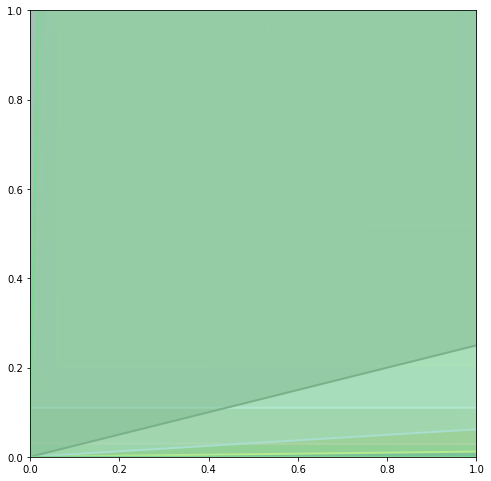

In [268]:
from skimage.transform import resize
import cv2
import os


orig_save = './imgs/'
mask_save = './masks/'

ims = './images/'
msks = './final_masks/'

if not os.path.exists(orig_save + category[0]):
    os.makedirs(orig_save + category[0])
    os.makedirs(mask_save + category[0])
    
    original = orig_save + category[0] + '/'
    masked = mask_save + category[0] + '/'
else:
    
    original = orig_save + category[0] + '/'
    masked = mask_save + category[0] + '/'

# print(original)        

# print(masked)
    
counter = 0
   
remove_imgs = '../../coco_corrupted_images/'
r = listdir(remove_imgs)
# print(r)
# b =0
# for i in r:
# #     print(i)
#     k = i.split('.')[0]
# #     print(k, int(k))
#     print(b)
#     imgIds.remove(int(k))
#     b+=1    

# for i in range(len(imgIds)):
# super_cats.remove('person')
for specific_category in nms:
    category = [specific_category]
    catIds = coco.getCatIds(catNms=category)
    imgIds = coco.getImgIds(catIds=catIds )
#     print(len(imgIds))
    for p in r:
#     print(i)
        k = p.split('.')[0]
        print(k, int(k))
        if k in imgIds:
            imgIds.remove(int(k))
#     print(len(imgIds))
    for i in range(120):

        imgId = coco.getImgIds(imgIds=imgIds[i])
        img = coco.loadImgs(imgIds[i])[0]



        I = io.imread('%s/%s/%s'%(dataDir,train_data,img['file_name']))
    #     I = io.imread(img['coco_url'])
    #     plt.axis('off')
    #     plt.imshow(I)

        I_resize = cv2.resize(I, (256, 256))


    #     plt.figure(i+1)
    #     fig, axes = plt.subplots(ncols=2, nrows=2)
    #     ax = axes.ravel()

    #     ax[0].set_title('Original Image')
    #     ax[0].imshow(I)

        annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
        anns = coco.loadAnns(annIds)
        conts = coco.showAnns(anns)
#         print(len(anns))
    #   Creating masks
        mask = coco.annToMask(anns[0])
        for j in range(len(anns)):
            mask += coco.annToMask(anns[j])
#         plt.imshow(mask, cmap=plt.cm.gray)
        mask_resize = cv2.resize(mask, (256, 256))
    #     plt.imsave(masked + 'mask_' + str(imgId[0]) + '.png', mask_resize, cmap=plt.cm.gray)
        plt.imsave(msks + 'mask_' + specific_category + '_' + str(imgId[0]) + '.png', mask_resize, cmap=plt.cm.gray)

    #     ax[1].set_title('Masked')
    #     ax[1].imshow(I)

    #     blck_image = np.zeros(I.shape, np.uint8)

    #     conts = np.asarray(conts)
    #     print(conts.shape)
    #     if (conts.ndim==3 and conts.shape[0]!=1):
    #         cnt = conts[0]
    #         cnt = np.asarray(cnt)
    #         cv2.drawContours(I, np.int32([cnt]), -1, (0,0,0), -1)
    #         cv2.drawContours(blck_image, np.int32([cnt]), -1, (255, 255, 255), -1)
    #     elif (conts.ndim==1):
    #         if conts.shape[0]==1:
    #             cnt=conts
    #         else:
    #             conts = np.reshape(conts, (conts.shape[0],1))
    #             cnt = conts[0]
    #         cnt = np.asarray(cnt)


    #         cv2.drawContours(I, np.int32([cnt[0]]), -1, (0,0,0), -1)
    #         cv2.drawContours(blck_image, np.int32([cnt[0]]), -1, (255, 255, 255), -1)

    #     blck_resize = cv2.resize(blck_image, (256, 256))
        counter+=1


    #     if(os.stat(blck_resize).st_size>=1000):
    #         counter+=1

    #     Original Image save
    #     io.imsave(original + str(imgId[0]) +'.png', I_resize)
        io.imsave(ims + specific_category + '_' +str(imgId[0]) + '.png', I_resize)
    # #     Masked Image save
    #     io.imsave(masked + 'mask_' + str(imgId[0]) + '.png', blck_resize) 

    #     mask = coco.annToMask(anns[0])
    # #     print(len(anns))
    #     for i in range(len(anns)):
    #         mask += coco.annToMask(anns[i])
# 4139
print(counter)
print(len(os.listdir(msks)))

In [175]:
counter=0

for file in os.listdir(msks):
#     print(file)
    if os.stat(msks + file).st_size<1024 or os.stat(msks + file).st_size>=2048:
        counter+=1
        os.remove(ims + file[5:])
        os.remove(msks + file) 

print(counter)
print(len(os.listdir(msks)))

2348
5803


In [125]:
counter=0

for file in os.listdir(masked):
#     print(file)
    if os.stat(masked + file).st_size<1024 or os.stat(masked + file).st_size>=3000:
        counter+=1
        os.remove(original + file[5:])
        os.remove(masked + file) 

print(counter)
print(len(os.listdir(masked)))

9
25


In [ ]:
# load and display image
I = io.imread('%s/%s/%s'%(dataDir,dataType,img['file_name']))

print(I.shape)
# use url to load image
# I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
# plt.figure()
# plt.plot(I[:,:,2])
io.imsave('orig_image.png', I)
# fig, ax=plt.subplots(1,1)
# ax.imshow(I)

plt.show()